In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
emotions_df = pd.read_csv('text.csv')
emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [112]:
emotions_df['text'][14]

'i feel my portfolio demonstrates how eager i am to learn but some who know me better might call it annoyingly persistent'

In [3]:
emotions_df['text'][0]

'i just feel really helpless and heavy hearted'

In [4]:
# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).
emotions_df['label'].value_counts()

1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: label, dtype: int64

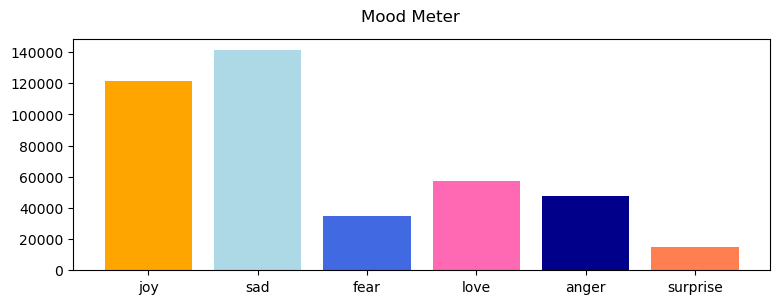

In [5]:
plt.figure(figsize=(9, 3))
colors = ['lightblue', 'orange', 'hotpink', 'darkblue', 'royalblue', 'coral'] 
plt.bar(emotions_df['label'].value_counts().index, emotions_df['label'].value_counts(), color=colors)
plt.suptitle('Mood Meter')

custom_labels = ['sad', 'joy', 'love', 'anger', 'fear', 'surprise'] 
plt.xticks(emotions_df['label'].value_counts().index, custom_labels)

plt.show()

In [6]:
# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).
emotions_df['label'] = emotions_df['label'].replace({0:0, 1:1, 2:1, 3:0, 4:0})
#emotions_df['label'].drop(5)

In [7]:
emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,0
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,0
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,0


In [8]:
emotions_df['label'].value_counts()

0    226216
1    175621
5     14972
Name: label, dtype: int64

In [9]:
sentiment_df = emotions_df[emotions_df.label != 5]

In [10]:
sentiment_df['label'].value_counts()

0    226216
1    175621
Name: label, dtype: int64

In [11]:
sentiment_df.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,0
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,0
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,0


In [119]:
sentiment_df[sentiment_df['label'] == 0]

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,0
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,0
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,0
...,...,...,...
416794,416794,im used to feeling isolated and a million mile...,0
416795,416795,i feel very disheartened or disenchanted,0
416797,416797,i prefer when im planning other peoples partie...,0
416805,416805,i began to realize that when i was feeling agi...,0


In [94]:
sentiment_df['label'].value_counts()

0    226216
1    175621
Name: label, dtype: int64

In [12]:
X=sentiment_df['text']
y=sentiment_df['label']

In [13]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=1)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(321469,) (80368,) (321469,) (80368,)


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [53]:
print(X_test_vec[30])


  (0, 1650)	1
  (0, 4852)	1


In [15]:
!pip install xgboost

In [16]:
#What is xgboost? should we use it here to create our model and prediction?
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=2, random_state=42)
xgb_model.fit(X_train_vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [17]:
y_pred = xgb_model.predict(X_test_vec)

In [18]:
accuracy_score(y_test, y_pred)

0.9446172606012343

In [19]:
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model Evaluation:
Accuracy: 0.9446172606012343

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     45298
           1       0.95      0.92      0.94     35070

    accuracy                           0.94     80368
   macro avg       0.95      0.94      0.94     80368
weighted avg       0.94      0.94      0.94     80368


Confusion Matrix:
 [[43557  1741]
 [ 2710 32360]]


In [20]:
#!pip install kaggle

In [21]:
### Notes from: https://www.geeksforgeeks.org/introduction-to-natural-language-processing/
#Step #1: Sentence Segmentation Breaking the piece of text in various sentences.
#Step #2: Word Tokenization Breaking the sentence into individual words called as tokens.
#Step #3: Predicting Parts of Speech for each token Predicting whether the word is a noun, verb, adjective, adverb, pronoun, etc.
#Step #4: Lemmatization Feeding the model with the root word.
#Step #5: Identifying stop words like ‘a’, ‘and’, ‘the’ etc.
#Step 6.1: Dependency Parsing and #6.2: Finding Noun Phrases
#Step #7: Named Entity Recognition(NER)
#Step #8: Coreference Resolution

In [22]:
import pickle
#https://stackoverflow.com/questions/35067957/how-to-read-pickle-file
file = 'Trained1.sav'
pickle.dump(xgb_model, open(file, 'wb'))

In [130]:
import joblib
#https://stackoverflow.com/questions/58344350/how-to-save-and-load-vocabulary-from-a-countvectorizer
# example for saving python object as pkl
joblib.dump(vectorizer, "vectorizer.pkl")

['vectorizer.pkl']

In [26]:
#read model
model = pickle.load(open('Trained1.sav', 'rb'))

In [109]:
new = ["I don't like this"]
second = ['I love this']
third = ['This is the best thing ever']
ori = ["i dont know i feel so lost"]

In [120]:
six = ['i would think that whomever would be unlukey enough to stay in this suite must feel like it is the most awful place on earth']

In [123]:
_14 = ['i feel my portfolio demonstrates how eager i am to learn but some who know me better might call it very persistent']

In [116]:
w =["everything is very good and i don't think it will get better i hate eveything"]

In [128]:
new_data = vectorizer.transform(_14)

In [129]:
# #test model on data
#X_new = X_test_vec[30]

prediction = model.predict(new_data)
print(prediction)
if (prediction[0]== 0):
    print('negative tweet')
else:
    print('positive tweet')

[1]
positive tweet
